In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import time 
import tensorflow as tf
tf.keras.optimizers.legacy.RMSprop
from keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,MaxPool2D,Dropout
from keras.models import load_model
from sklearn.model_selection import train_test_split,GridSearchCV
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid', context='notebook', palette='deep')

In [2]:
train = pd.read_csv(r'C:\Sync\train.csv')
test = pd.read_csv(r'C:\Sync\test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1)
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y_train

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

<AxesSubplot: xlabel='label', ylabel='Count'>

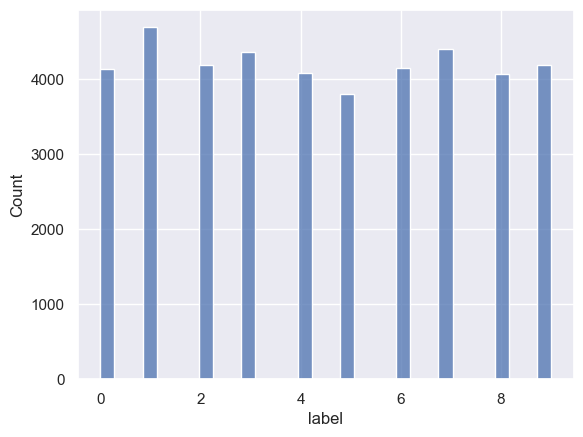

In [6]:
sns.histplot(Y_train)

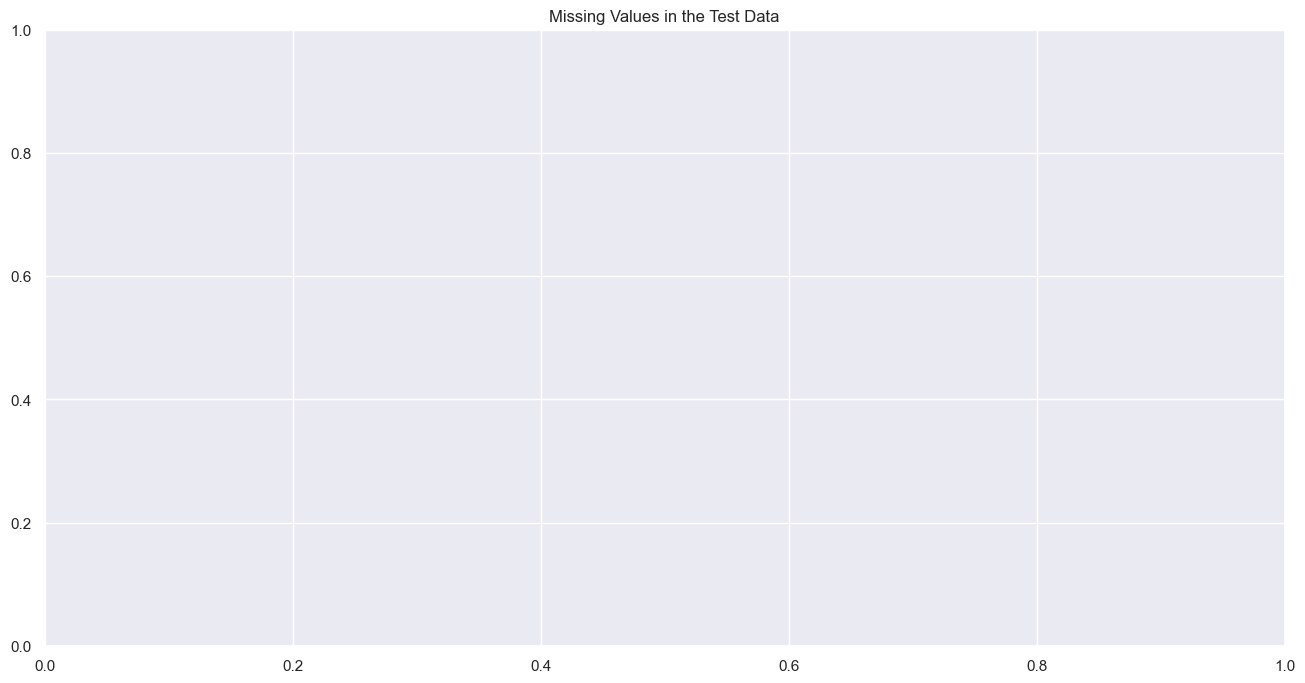

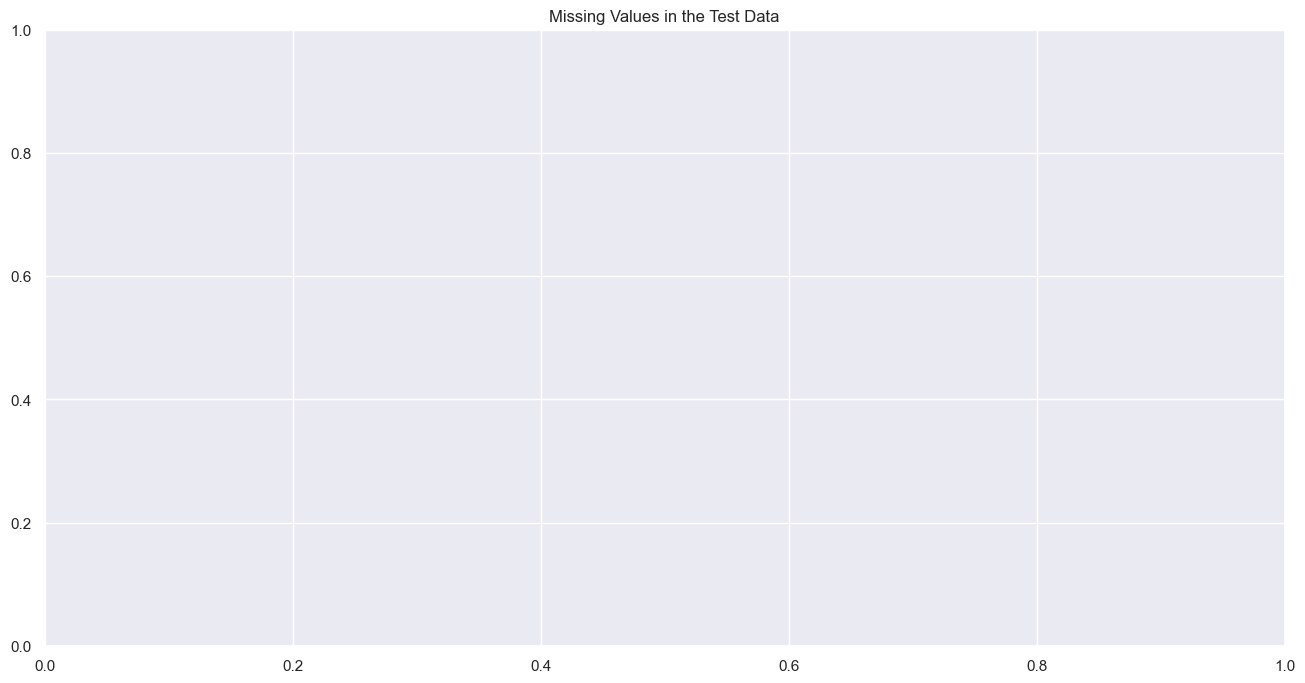

In [7]:
train_test_df = [train,test]
for i in train_test_df:
    nan_cols = i.columns.tolist()
    plt.figure(figsize=(16,8))
    plt.title('Missing Values in the Test Data')
    plt.show() 

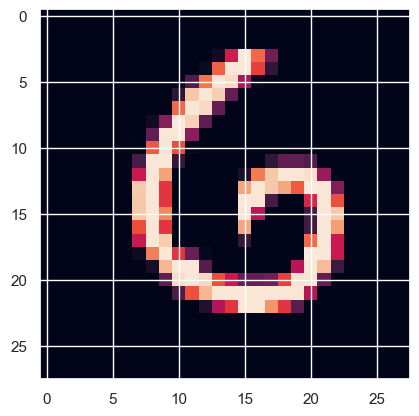

In [8]:
X_train = X_train / 255.0
test = test / 255.0

X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=15)
Pic = plt.imshow(X_train[10])

In [9]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Apply data augmentation
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1,
                             height_shift_range=0.1, zoom_range=0.1)
datagen.fit(X_train)

# Train the model
model.fit(datagen.flow(X_train, Y_train, batch_size=86), epochs=20,verbose = 1)

Epoch 1/20
440/440 [==============================] - 48s 107ms/step - loss: 0.5751 - accuracy: 0.8178
Epoch 2/20
440/440 [==============================] - 47s 107ms/step - loss: 0.2363 - accuracy: 0.9289
Epoch 3/20
440/440 [==============================] - 47s 106ms/step - loss: 0.1867 - accuracy: 0.9450
Epoch 4/20
440/440 [==============================] - 47s 106ms/step - loss: 0.1584 - accuracy: 0.9532
Epoch 5/20
440/440 [==============================] - 46s 104ms/step - loss: 0.1492 - accuracy: 0.9567
Epoch 6/20
440/440 [==============================] - 45s 103ms/step - loss: 0.1396 - accuracy: 0.9606
Epoch 7/20
440/440 [==============================] - 44s 101ms/step - loss: 0.1363 - accuracy: 0.9624
Epoch 8/20
440/440 [==============================] - 45s 103ms/step - loss: 0.1381 - accuracy: 0.9632
Epoch 9/20
440/440 [==============================] - 45s 102ms/step - loss: 0.1334 - accuracy: 0.9631
Epoch 10/20
440/440 [==============================] - 45s 102ms/step - l

In [10]:
pred = model.predict(test)
classes = pred.argmax(axis=-1)

sub = pd.read_csv(r'C:\Sync\sample_submission.csv')
sub.Label = classes
sub.head()

875/875 [==============================] - 8s 7ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [11]:
sub.to_csv('submission.csv', index = False)